# Introduction to Software Bill Of Materials (SBOM)

In late 2021, a [critical security vulnerability was discovered in a commonly used logging library, Log4j](https://www.ncsc.gov.uk/information/log4j-vulnerability-what-everyone-needs-to-know).  If exploited, this vulnerability was capable of allowing a bad actor to remotely control the compormised system.  Once this vulnerability was announced, companies and individuals spent many hours combing through countless applications looking for and patching systems running vulnerable versions of the software.  

As this effort was ongoing, many were asking, "Isn't there a better way to track this information."

In response to this, and other similar wide spread vulnerabilities, the President of the United States issued an [Executive Order](https://www.whitehouse.gov/briefing-room/presidential-actions/2021/05/12/executive-order-on-improving-the-nations-cybersecurity/) in May of 2021 which tasked the National Instititue of Stanards and Technology (NIST) with providing guidance on how to secure software supply chains.  One of the critical pieces of that guidance was minimum standards and guidance on how to use Software Bill of Materials (SBOM).  


The use of SBOMs in software is not new, but with the increased focus on cybersecurity strategy they have become a critical tool in combating real and potential threats by providing explainability, tracability, and transparency to a companies software supply chain.

## What is a Software Bill of Materials (SBOM)

A software bill of materials (SBOM) is a critical component of software development and management, helping organizations to improve the transparency, security, and reliability of their software applications. An SBOM acts as an "ingredient list" of libraries and components of an software application that:

* Enables software creators to track dependencies within their applications
* Provides security personnel the ability to examine and risk potential vulnerabilities within an environment
* Provide legal personnel the information needed to assure that a particular software is in compliance with all licensing requirements.

When combined together, the functionality provided by SBOMs is a critical piece of 

A software bill of materials (SBOM) is a comprehensive list of the components, libraries, and dependencies used in a software application or system. It provides a detailed breakdown of the software's architecture, including the names, versions, licenses, and optionally the vulnerabilities of each component.

An SBOM provides those who create, purchase, and operate software with insight and understanding of the supply chain enabling them to track known and newly emerged vulnerabilities and risks. SBOM and SBOM analysis are part of the foundational data layer on which further security
tools, practices, and procedures should be built.  SBOMs can be generated using a variety of tools and technologies, including open-source tools, automated tools, and manual processes. They can be formatted in different formats, such as JSON, YAML, or XML, to suit different needs and use cases.  There are currently two main open-source and machine-readable formats for SBOMs:

* [CycloneDX](https://cyclonedx.org/) - developed by the Open Web Application Security Project (OWASP) this is a format that is focused on providing simple automation to ease adoption.  In addition to the minimum requirements for data in an SBOM, CycloneDX files can also contain information about associated vulnerabilities within the system or application.

* [SPDX](https://spdx.dev/) - Developed by the Linux Foundation this format was originally created to facilitate the exchange of software metadata, with a particular focus on licensing information.  Since it's creation in 2011 this has evolved to include additional data fields that enables its use as an SBOM format. 

While there is no one specific format for SBOMs, NIST has provided some guidance around the best practices and minimum elements for SBOMs, which are linked below:

* [Recommendations for Software Bill of Materials
(SBOM) Management](https://media.defense.gov/2023/Dec/14/2003359097/-1/-1/0/CSI-SCRM-SBOM-MANAGEMENT.PDF)
* [Secure Software Development Framework](https://nvlpubs.nist.gov/nistpubs/SpecialPublications/NIST.SP.800-218.pdf)
* [The Minimum Elements for a Software Bill of Materials](https://www.ntia.doc.gov/sites/default/files/publications/sbom_minimum_elements_report_0.pdf)



## Why use Graphs for SBOMs

SBOMs describe the complex dependency and relationships between components of a software system.  Graphs are excellent for modeling these kinds of interconnected relationships, with nodes representing components and edges representing dependencies and relationships between these components.  SBOMs often contain multi-level hierarchies and recursion. Graph data structures handle recursive relationships very naturally. Traversing a graph allows you to explore dependencies deeply through different levels.  Graphs make it easy to analyze networks and flows. Using graph algorithms and metrics, you can analyze an SBOM to identify critical components and dependencies, single points of failure, security vulnerabilities, license compatibilities, and more. These kinds of analyses provide useful insights.

In addition to the structural aspects of a graph, graph visualizations help make software relationships more understandable for humans. Seeing a picture of an SBOM graph highlights patterns and issues more effectively than just looking at a flat list of components and dependencies.

In summary, the networked, hierarchical nature of software component relationships matches very well with the graph abstraction. This makes graphs a natural fit for trying to model, analyze, visualize and build tools around Software Bill of Materials.

## Use Cases for Graphs and SBOMs

Graphs can be useful for visualizing and analyzing SBOMs in several ways:

- Dependency graphs - These show how different components in the software relate to and depend on each other. Graphs make these complex relationships easier to visualize.

- Vulnerability Graphs - Graphs make it easy to determine and assign associated risks with different vulnerabilities in order to priortize fixing known issues. 

- Supply chain graphs - SBOMs trace the components and dependencies up the software supply chain. Graphs can illustrate the flow of open source components from lower-level suppliers up to the final product. This helps identify vulnerabilities or licensing issues in the supply chain.


In summary, graphs provide simplified and intuitive visual representation for the complex components and relationships described in an SBOM. Whether it's high-level architecture or detailed flows within the software, graphs turn the SBOM into more easily digestible visual insights. They make interpreting and communicating SBOM details much more accessible to a variety of stakeholders trying to leverage them.

## What does our SBOM look like as a Graph

For these examples we have provided a Python module that ingests both CycloneDX and SPDX JSON file formats and attempts to unify these disparate formats through a few key node and edge types.  The data model generated is shown here:

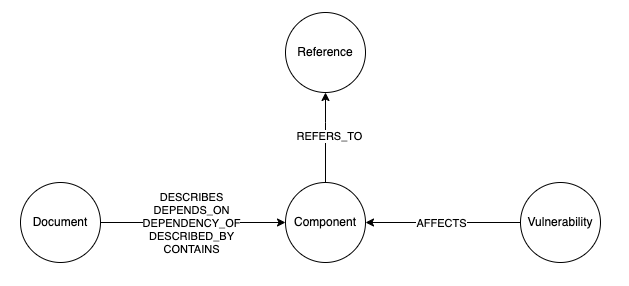

The key elements of this data model are:

**Node Types**
* `Document` - This represents the SBOM document as well as the metadata associated with that SBOM.  In a CycloneDX file, this is sourced from the [`metadata`](https://cyclonedx.org/guides/sbom/object-model/#metadata) element of the SBOM.  In an SPDX file, this is sourced from the ['document'](https://spdx.github.io/spdx-spec/v2.3/document-creation-information/) element of the SBOM.
* `Component` - This represents a specific component of a software system.  In a CycloneDX file, this is sourced from the [`externalReferences`](https://cyclonedx.org/guides/sbom/object-model/#components) elements of the SBOM `component`.  In an SPDX file, this is sourced from the ['packages'](https://spdx.github.io/spdx-spec/v2.3/package-information/) elements of the SBOM.
* `Reference` - This represents a reference to any external system which the system wanted to include as a reference.  This can range from package managers, URLs to external websites, etc.  In a CycloneDX file, this is sourced from the [`components`](https://cyclonedx.org/guides/sbom/object-model/#components) elements of the SBOM.  In an SPDX file, this is sourced from the ['externalRef'](https://spdx.github.io/spdx-spec/v2.3/package-information/#721-external-reference-field) elements of the SBOM `packages`.
* `Vulnerability` - This represents a specific known vulnerability for a component.  This is only available with CycloneDX files and is sourced from the [`vulnerabilities`](https://cyclonedx.org/guides/sbom/object-model/#vulnerabilities) elements of the SBOM.

**Edge Types**
* `DESCRIBES`/`DEPENDS_ON`/`DEPENDENCY_OF`/`DESCRIBED_BY`/`CONTAINS` - This represents the type of relationship between a `Document` and a `Component` in the system.  For CycloneDX files only the `DEPENDS_ON` field is used.  For SPDX files the appropriate edge type is determined by the relationship type specified in the [`relationship`](https://spdx.github.io/spdx-spec/v2.3/relationships-between-SPDX-elements/) elements.
* `REFERS_TO` - This represents a reference between a `Component` and a `Reference`
* `AFFECTS` - This represents that a particular `Component` is affected by the connected `Vulnerability`



## Next Steps

In this notebook we discussed what a SBOM is, why they are important, why graphs are a good fit, and how they are structures.

Below are several notebooks, each of which provides a deeper dive into a specific use case for SBOMs. 

* [SBOM Dependency Analysis](./01-SBOM-Dependency-Analysis.ipynb)

* [SBOM Vulnerability Analysis](./02-SBOM-Vulnerability-Analysis.ipynb)